In [1]:
import pandas as pd

# Wine Quality Prediction

The `winequality-red.csv` dataset contains physiochemical properties of red variants of the Portuguese "Vinho Verde" wine.

In [2]:
# load wine dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/winequality-red.csv'
wine = pd.read_csv(url)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Part 1** We'll set (an arbitrary) cutoff for the variable `quality` at e.g. 7 or higher getting classified as 1 (good) and the remainder as 0 (not good).

Write a function called `wine_quality` that returns 1 if `quality>=cutoff`, and 0 otherwise.

In [3]:
def wine_quality(quality):
    cutoff = 6
    # your  code here
    return (0 + 1*(quality>=cutoff))
    

Use Pandas `.apply()` method to apply the `wine_quality` function to the column `quality`. Assign the result to the `quality` column.

In [7]:
wine.quality = wine.quality.apply(wine_quality)


**Part 2:** We'll train a logistic regression model that predicts the quality (1-good, 0-bad) based on the physiochemical properties (fixed acidity, volatile acidity,..., alcohol.)

Define the feature matrix X and the target vector y from the `wine` dataframe, and then split X and y into training and testing sets.

In [10]:
# train test split
from sklearn.model_selection import train_test_split

X = wine.drop('quality', axis=1)
y = wine.quality
X_train,X_test,y_train,y_test = train_test_split(X,y)

Train a logistic regression model

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p> If the algorithm that trains the logistic regression model does not converge, you'll get a TOTAL NO. of ITERATIONS REACHED LIMIT warning. In this case you can set the logistic regression <tt> max_iter </tt> hyperparamter to a higher value, eg., <tt> max_iter=1000 </tt>. </p>
</div>

In [12]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(max_iter=1000) # set max_iter to high # if a warning shows


logreg_clf.fit(X_train,y_train)
y_test_pred = logreg_clf.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

**Part 3:** We'll use accuracy and a confusion matrix to evaluate the performance of our model on the test set.

In [13]:
# import accuracy_score and confusion_matrix from sklearn.metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay


0.7575
0.7874396135265701
0.7546296296296297


In [5]:
# accuracy
print(accuracy_score(y_test,y_test_pred))

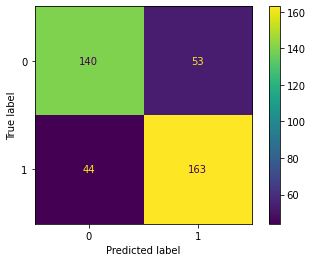

In [15]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg_clf, X_test,y_test)